# Implementation of Iris Datasets Using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import datasets

In [13]:
iris = datasets.load_iris()


In [16]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [108]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Converting into Pandas Dataframe

In [109]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [111]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
df['target'] = iris.target

In [114]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [117]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [118]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [122]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [123]:
print(df.groupby('target').size())

target
0    50
1    50
2    50
dtype: int64


## Data Visualization

#### Pairplot

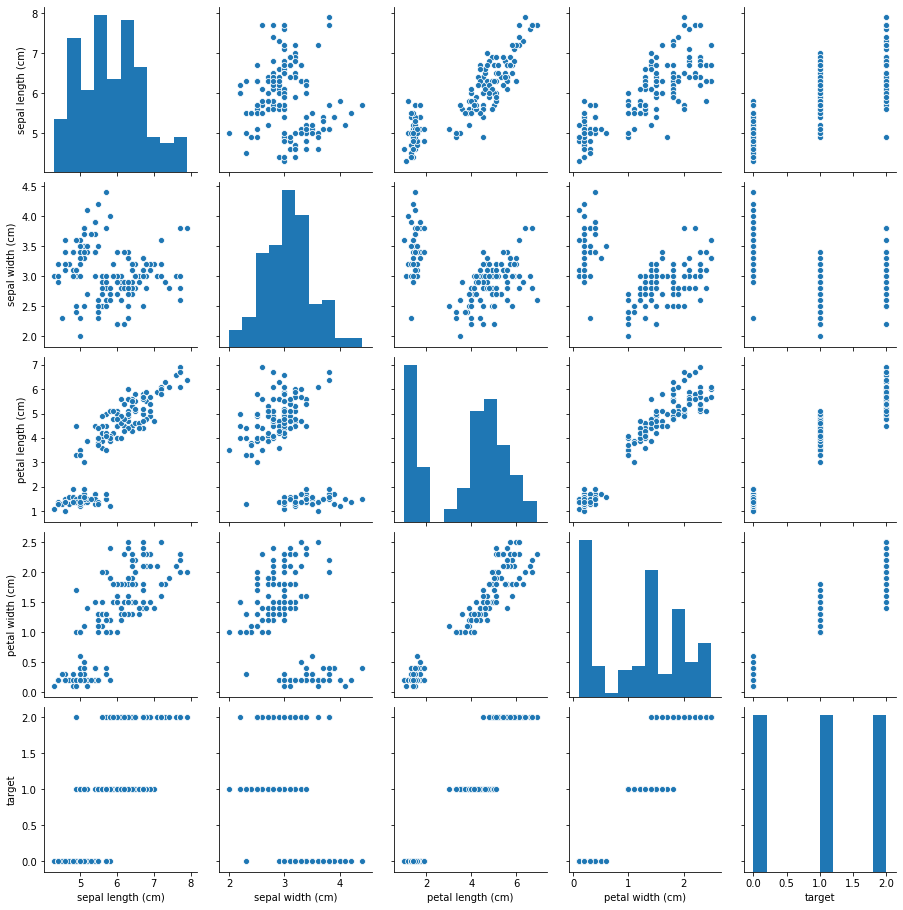

In [136]:
sns.pairplot(df)

#### Distribution Plot

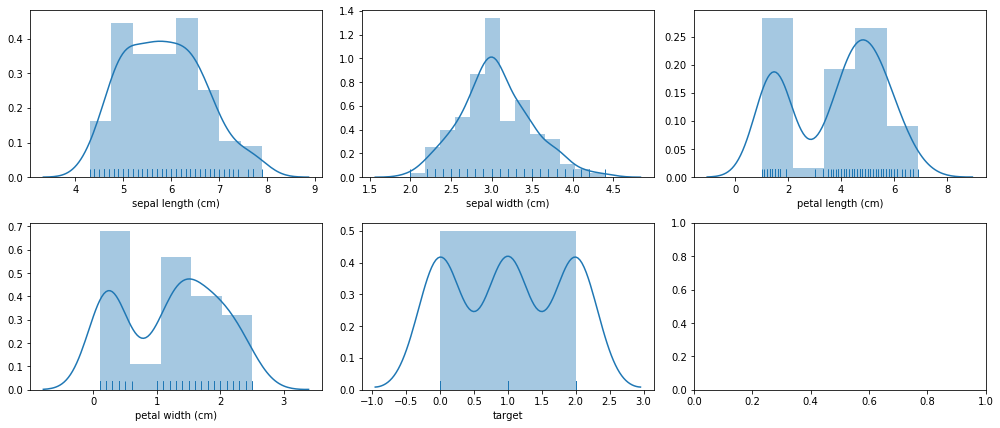

In [188]:
rows = 2
cols = 3

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (14,6))

col = df.columns

index = 0

for i in range(rows):
    for j in range(cols):
        if index == 5:
            break
        sns.distplot(df[col[index]], ax = ax[i][j], rug = True)
        index = index + 1
plt.tight_layout()

### Creating a correlation matrix

In [141]:
corrmat = df.corr()
corrmat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


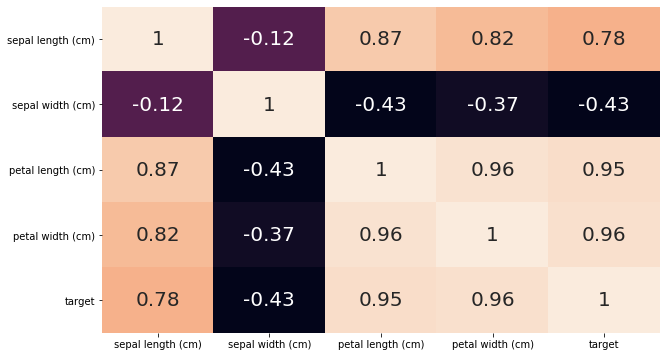

In [151]:
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(corrmat, annot = True, annot_kws = {'size':20}, cbar = False)

From the above heatmap we see that almost all of the features are important for predicting the target variable

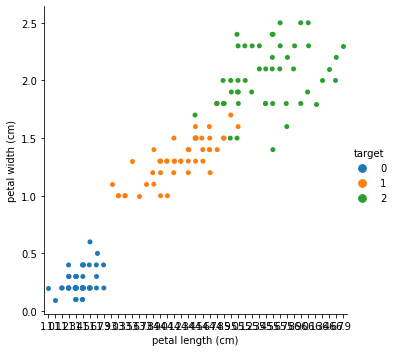

In [167]:
sns.catplot(x = 'petal length (cm)', y = 'petal width (cm)', data = df, hue = 'target')

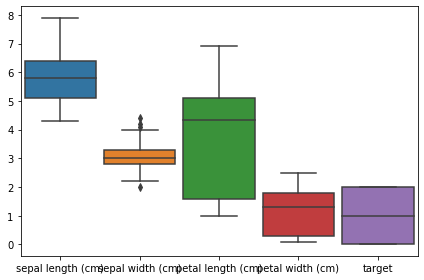

In [182]:
sns.boxplot(data = df,width = 0.9)
plt.tight_layout()

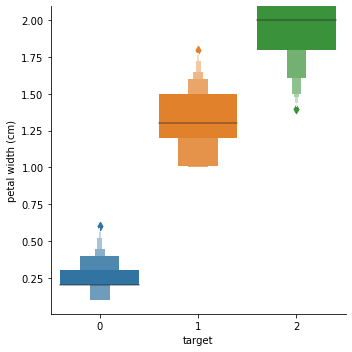

In [186]:
sns.catplot(x = 'target', y = 'petal width (cm)', kind = 'boxen', data = df)

#### Getting data into X and Y


In [24]:
X = iris.data
y = iris.target

In [25]:
X.shape,y.shape

((150, 4), (150,))

#### Splitting Data into Train and Test Datasets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#### Generating model for different values of K

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [39]:
def knn_model(k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train,y_train)
    
    y_predict = model.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    print('Accuracy Score with k = ',k,' is', score)

In [40]:
knn_model(3)

Accuracy Score with k =  3  is 0.96


In [41]:
knn_model(5)

Accuracy Score with k =  5  is 0.98


In [42]:
knn_model(7)

Accuracy Score with k =  7  is 0.98


In [43]:
knn_model(9)

Accuracy Score with k =  9  is 0.98


#### Standardization 

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_Scaled = scaler.fit_transform(X,y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [58]:
knn_model(3)

Accuracy Score with k =  3  is 0.96


In [59]:
knn_model(5)

Accuracy Score with k =  5  is 0.98


In [60]:
knn_model(7)

Accuracy Score with k =  7  is 0.98


In [61]:
knn_model(9)

Accuracy Score with k =  9  is 0.98


#### Finding Optimal K value

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
neighbors = list(range(1,50,2))

In [77]:
neighbors

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_Scaled, y, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())


In [78]:
MSE = [1-x for x in cv_scores]
MSE

[0.046666666666666634,
 0.046666666666666634,
 0.046666666666666634,
 0.046666666666666634,
 0.046666666666666634,
 0.053333333333333344,
 0.046666666666666634,
 0.040000000000000036,
 0.053333333333333344,
 0.05999999999999994,
 0.05999999999999994,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.06666666666666665,
 0.08666666666666667,
 0.08666666666666667,
 0.09999999999999998,
 0.10666666666666669,
 0.09999999999999998,
 0.10666666666666669,
 0.11999999999999988,
 0.1266666666666666]

In [80]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('Optimal Value of K is ',optimal_k)

Optimal Value of K is  15


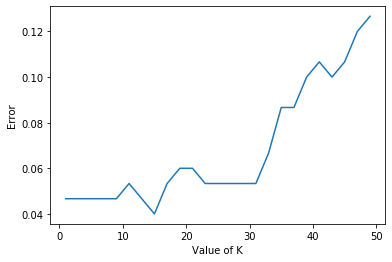

In [86]:
plt.plot(neighbors, MSE)
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.show()


In [87]:
knn_model(15)

Accuracy Score with k =  15  is 0.98
